# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [2]:
# Gives Python code a good structure.
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

#### Importing Data Set

In [3]:
project5 = pd.read_csv(
    "C:/Users/Eldred OFUA/Desktop/Data Science and Business Analytics PG Program/6. Ensemble Techniques/Project 5/EasyVisa.csv"
)

<IPython.core.display.Javascript object>

In [4]:
# copying data to another variable to keep the original data
data = project5.copy()

<IPython.core.display.Javascript object>

#### Overview of the Dataset

* To view the first 5 rows

In [5]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

* To view the last 5 rows

In [6]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


<IPython.core.display.Javascript object>

- Data downloaded correctly

#### Understand the shape of the dataset

In [8]:
data.shape

(25480, 12)

<IPython.core.display.Javascript object>

* There are 12 columns and 25,480 rows in this data set.

#### Checking the data type

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

* Case ID is just for identification.
* Dependent variable is the Case status which is of categorical type.
* We have 3 integer type columns and 9 categorical columns.
* There are no missing values in the data

#### Checking the duplicate values

In [10]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

* There are no duplicate values

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

* Checking Statistical Summary

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

* It is observed that `no_of_employees` has a minimum value of -26.0000 This is an anomaly. 
* Average `prevailing_wage`is 74,455.81 USD, while the maximum is 319,210.27 USD.

In [12]:
# Fixing the negative values in number of employees columns

data.loc[data["no_of_employees"] < 0, ["no_of_employees"]].shape

(33, 1)

<IPython.core.display.Javascript object>

In [13]:
# taking the absolute values for number of employees
data["no_of_employees"] = abs(data["no_of_employees"])

<IPython.core.display.Javascript object>

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

* As can be observed, the `no_of_employees` has a minimum value of 11.0000

#### checking the count of each unique category in each of the categorical variables

In [15]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

<IPython.core.display.Javascript object>

In [16]:
# checking the number of unique values
data["case_id"].value_counts()

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64

<IPython.core.display.Javascript object>

In [17]:
# I have to drop the case ID since it does not contribute to the analysis

data.drop(["case_id"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [18]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

The `case_id` column have been dropped

#### Univariate Analysis

In [19]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

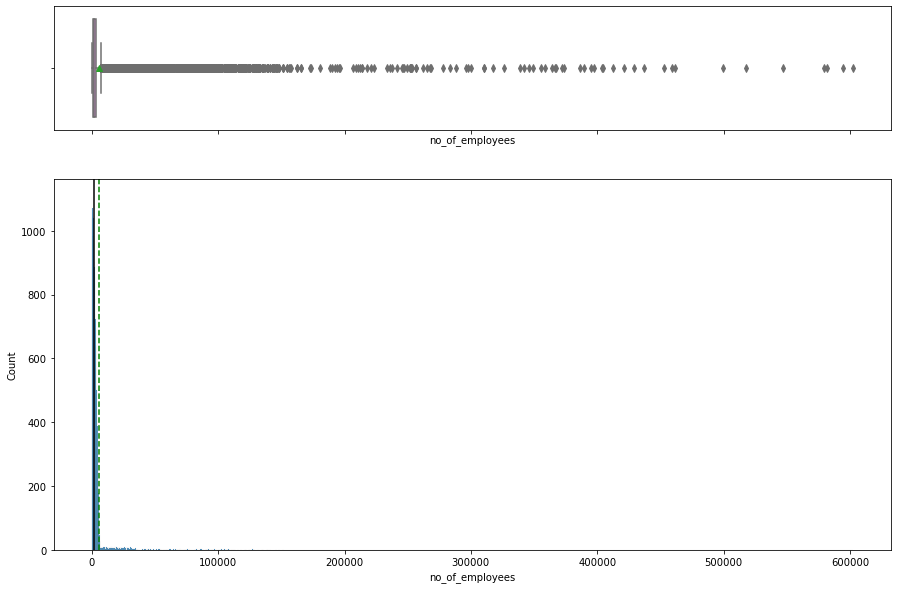

<IPython.core.display.Javascript object>

In [20]:
# Observation on number of employees

histogram_boxplot(data, "no_of_employees")

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

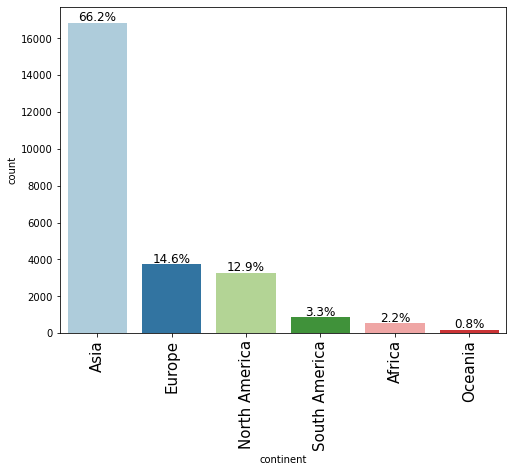

<IPython.core.display.Javascript object>

In [22]:
# Observation on continent

labeled_barplot(data, "continent", perc=True)

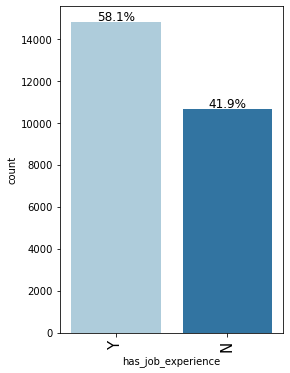

<IPython.core.display.Javascript object>

In [23]:
# Observation on job experience

labeled_barplot(data, "has_job_experience", perc=True)

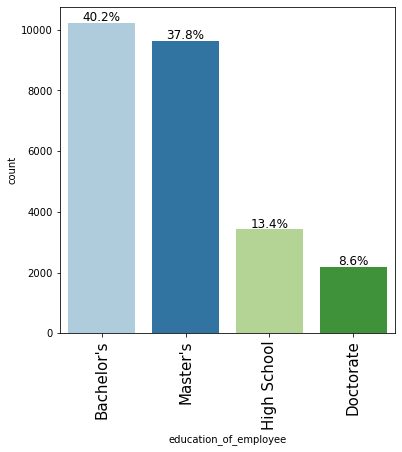

<IPython.core.display.Javascript object>

In [25]:
# Observation on Education of Employee

labeled_barplot(data, "education_of_employee", perc=True)

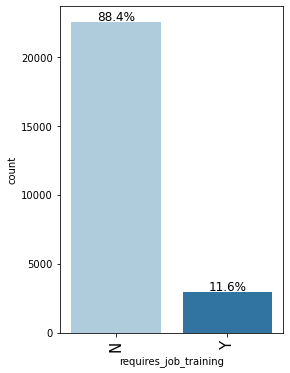

<IPython.core.display.Javascript object>

In [26]:
# Observation on Job Training

labeled_barplot(data, "requires_job_training", perc=True)

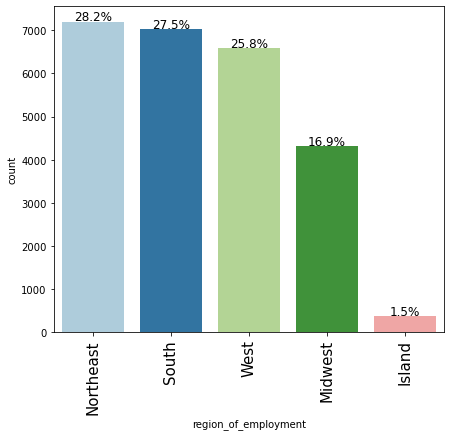

<IPython.core.display.Javascript object>

In [27]:
# Observations on region of employment

labeled_barplot(data, "region_of_employment", perc=True)

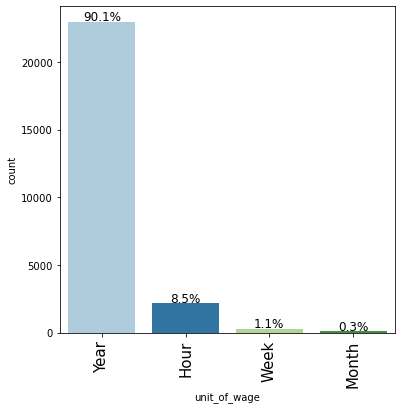

<IPython.core.display.Javascript object>

In [28]:
# Observations on Unit of Wage

labeled_barplot(data, "unit_of_wage", perc=True)

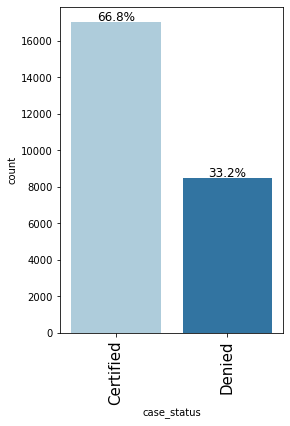

<IPython.core.display.Javascript object>

In [29]:
# Observations on case status

labeled_barplot(data, "case_status", perc=True)

#### Bivariate Analysis

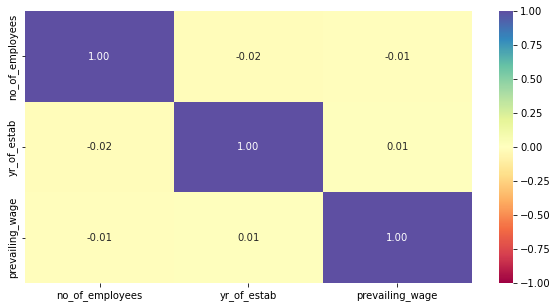

<IPython.core.display.Javascript object>

In [30]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There are no strong correlation between all the columns with integers.

In [32]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [33]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


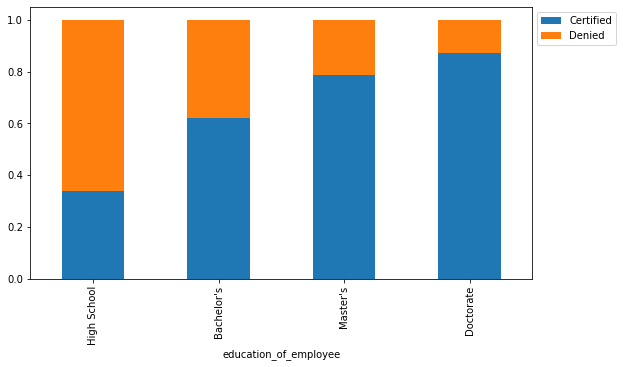

<IPython.core.display.Javascript object>

In [34]:
stacked_barplot(data, "education_of_employee", "case_status")

* As shown by the chart, education positively increases a person's chances of getting a visa. The higher the educational status, the more the odds of being given a visa.

2. How does the visa status vary across different continents? 

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


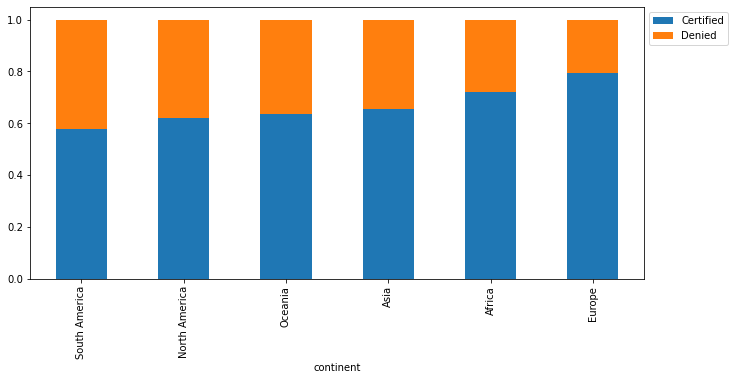

<IPython.core.display.Javascript object>

In [36]:
stacked_barplot(data, "continent", "case_status")

* Europe have the highest chances of getting a Visa, followed by Africa, Asia, Oceania, with the least being South America

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


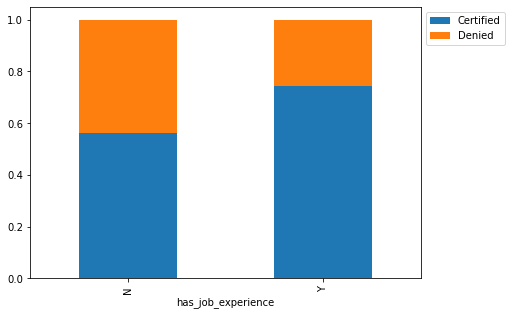

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(data, "has_job_experience", "case_status")

* About 75% of the personnel with work experience got their Visa as against 55% of persons with no work experience

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


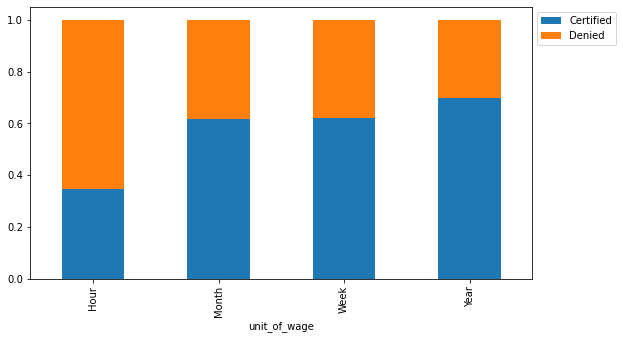

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(data, "unit_of_wage", "case_status")

Jobs with hourly pay, gets the least visa chances.

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

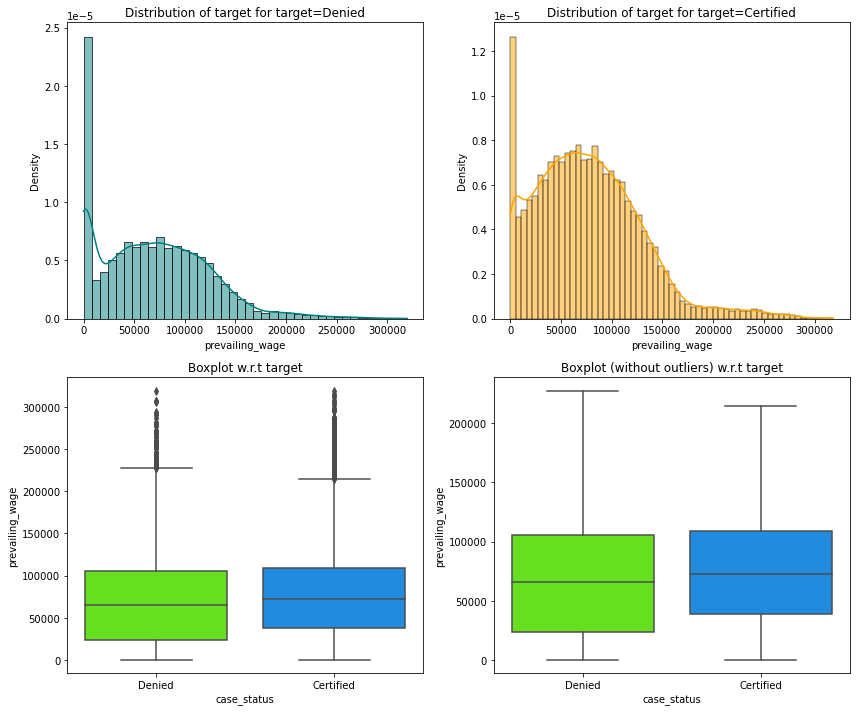

<IPython.core.display.Javascript object>

In [39]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

#### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [40]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop(
    ["case_status"], axis=1
)  ## Complete the code to drop case status from the data
Y = data["case_status"]

X = pd.get_dummies(X, drop_first=True)  # code to create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)  ## Complete the code to split the data into train and test in the ratio 70:30

<IPython.core.display.Javascript object>

In [41]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

#### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

#### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



#### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [42]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [43]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Decision Tree - Model Building and Hyperparameter Tuning

In [44]:
# Decision Tree Model

model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

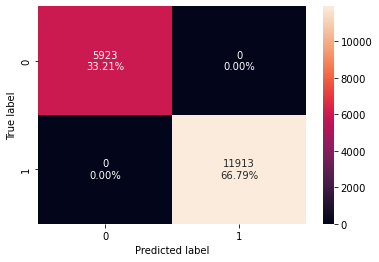

<IPython.core.display.Javascript object>

In [45]:
# Checking model performance on training set

confusion_matrix_sklearn(model, X_train, y_train)

In [46]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

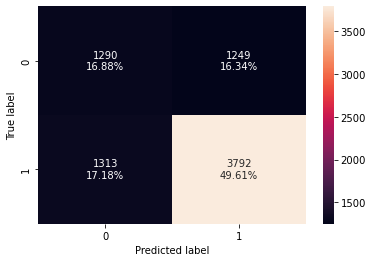

<IPython.core.display.Javascript object>

In [47]:
# Checking model performance on test set

confusion_matrix_sklearn(model, X_test, y_test)

In [48]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


<IPython.core.display.Javascript object>

* Checking important features

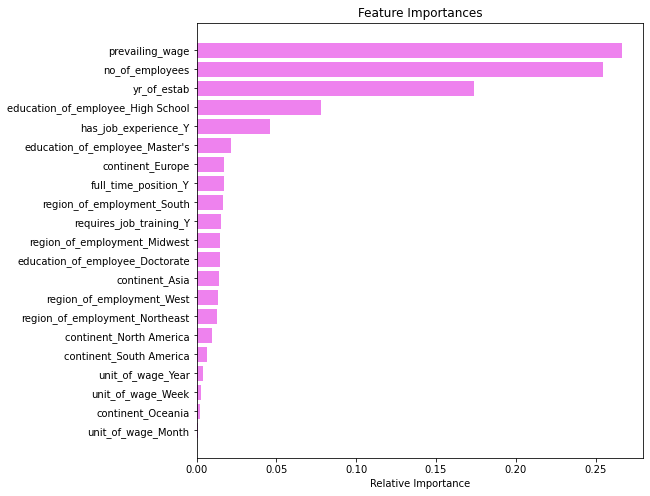

<IPython.core.display.Javascript object>

In [50]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important feature is `prevailing_wage`, followed by `no_of_employees` and `yr_of_estab`

#### Hyperparameter Tuning - Decision Tree

In [51]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    dtree_estimator, parameters, scoring=scorer, cv=5
)  ## Complete the code to run grid search with n_jobs = -1

grid_obj = grid_obj.fit(
    X_train, y_train
)  ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

<IPython.core.display.Javascript object>

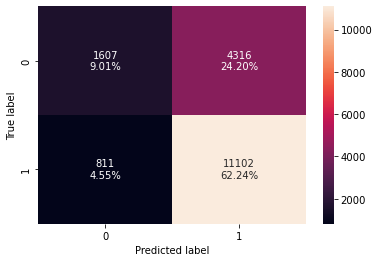

<IPython.core.display.Javascript object>

In [53]:
# Checking Performance on Training Set

confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [54]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


<IPython.core.display.Javascript object>

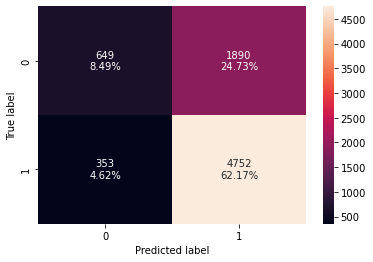

<IPython.core.display.Javascript object>

In [55]:
# Checking Performance on Test Set

confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [56]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


<IPython.core.display.Javascript object>

### Bagging - Model Building and Hyperparameter Tuning

#### Bagging Classifier

In [57]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

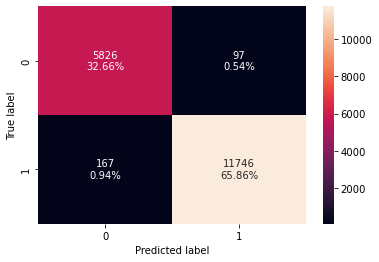

<IPython.core.display.Javascript object>

In [58]:
# Checking model performance on training set

confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [59]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


<IPython.core.display.Javascript object>

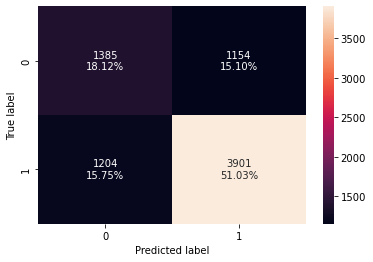

<IPython.core.display.Javascript object>

In [60]:
# Checking model performance on test set

confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [61]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


<IPython.core.display.Javascript object>

#### Hyperparameter Tuning - Bagging Classifier

In [62]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

<IPython.core.display.Javascript object>

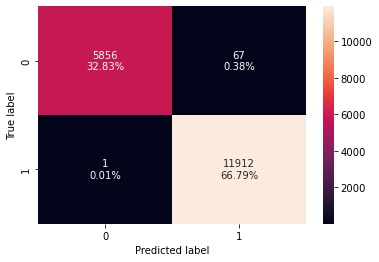

<IPython.core.display.Javascript object>

In [63]:
# Checking model performance on training set

confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [64]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.996187,0.999916,0.994407,0.997154


<IPython.core.display.Javascript object>

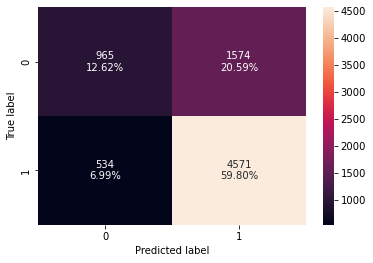

<IPython.core.display.Javascript object>

In [65]:
# Checking model performance on test set

confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [66]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.724228,0.895397,0.743857,0.812622


<IPython.core.display.Javascript object>

### Random Forest

In [67]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

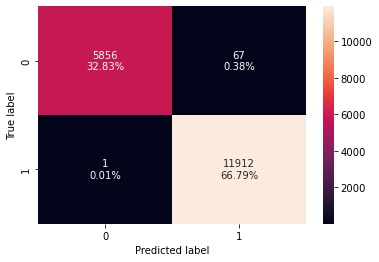

<IPython.core.display.Javascript object>

In [68]:
# Checking model performance on training set

confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [69]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


<IPython.core.display.Javascript object>

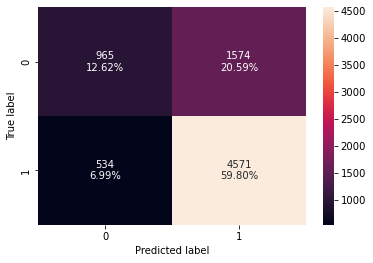

<IPython.core.display.Javascript object>

In [70]:
# Checking model performance on test set

confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [71]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.720827,0.832125,0.768869,0.799247


<IPython.core.display.Javascript object>

#### Hyperparameter Tuning - Random Forest

In [72]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

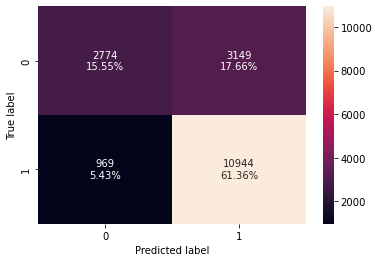

<IPython.core.display.Javascript object>

In [73]:
# Checking model performance on training set

confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [74]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


<IPython.core.display.Javascript object>

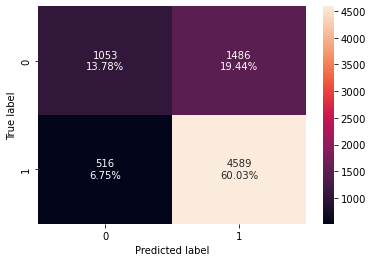

<IPython.core.display.Javascript object>

In [75]:
# Checking model performance on test set

confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [76]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738095,0.898923,0.755391,0.82093


<IPython.core.display.Javascript object>

### Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [77]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

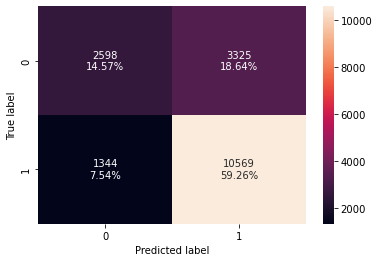

<IPython.core.display.Javascript object>

In [78]:
# Checking model performance on training set

confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [79]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


<IPython.core.display.Javascript object>

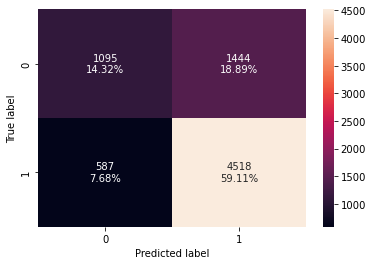

<IPython.core.display.Javascript object>

In [80]:
# Checking model performance on test set

confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [82]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - AdaBoost Classifier

In [83]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

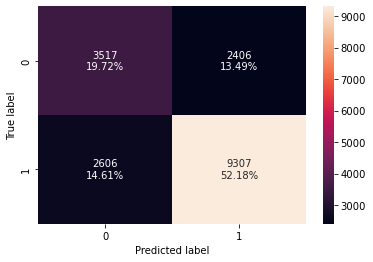

<IPython.core.display.Javascript object>

In [84]:
# Checking model performance on training set

confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [85]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


<IPython.core.display.Javascript object>

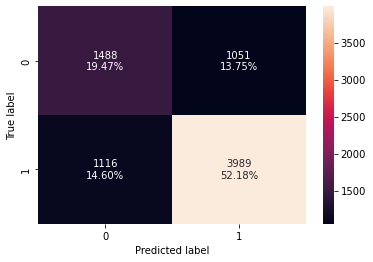

<IPython.core.display.Javascript object>

In [86]:
# Checking model performance on test set

confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [87]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


<IPython.core.display.Javascript object>

#### Gradient Boosting Classifier

In [88]:
gb_classifier = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

<IPython.core.display.Javascript object>

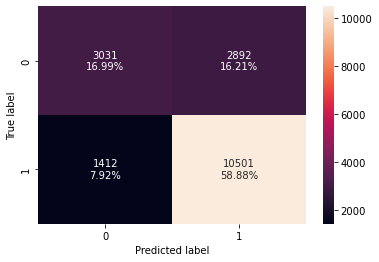

<IPython.core.display.Javascript object>

In [89]:
# Checking model performance on training set

confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [90]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.75869,0.881474,0.784066,0.829922


<IPython.core.display.Javascript object>

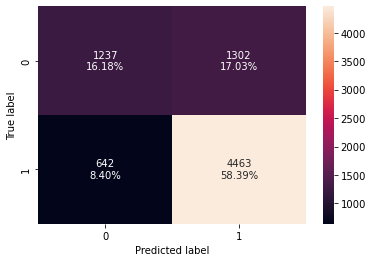

<IPython.core.display.Javascript object>

In [91]:
# Checking model performance on test set

confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [92]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.745683,0.874241,0.774154,0.821159


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - Gradient Boosting Classifier

In [93]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

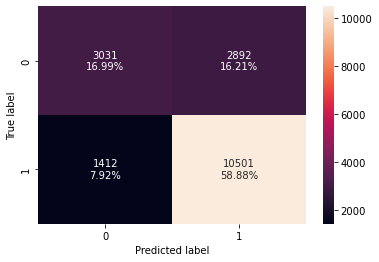

<IPython.core.display.Javascript object>

In [94]:
# Checking model performance on training set

confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [95]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.75869,0.881474,0.784066,0.829922


<IPython.core.display.Javascript object>

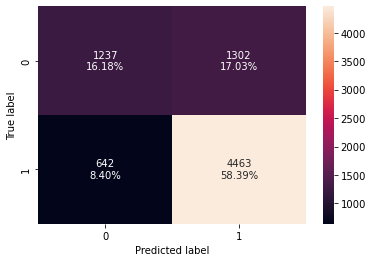

<IPython.core.display.Javascript object>

In [96]:
# Checking model performance on test set

confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [102]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.745683,0.874241,0.774154,0.821159


<IPython.core.display.Javascript object>

### Model Performance Comparison and Final Model Selection

In [97]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier
Accuracy,1.0,0.712548,0.985198,0.996187,0.999944,0.769119,0.738226,0.718995,0.758690,0.758690
Recall,1.0,0.931923,0.985982,0.999916,0.999916,0.918660,0.887182,0.781247,0.881474,0.881474
Precision,1.0,0.720067,0.991810,0.994407,1.000000,0.776556,0.760688,0.794587,0.784066,0.784066
F1,1.0,0.812411,0.988887,0.997154,0.999958,0.841652,0.819080,0.787861,0.829922,0.829922


<IPython.core.display.Javascript object>

In [103]:
# testing performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
]
print("Testing performance comparison:")
models_train_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier
Accuracy,0.664835,0.706567,0.691523,0.724228,0.720827,0.738095,0.734301,0.716510,0.745683,0.745683
Recall,0.742801,0.930852,0.764153,0.895397,0.832125,0.898923,0.885015,0.781391,0.874241,0.874241
Precision,0.752232,0.715447,0.771711,0.743857,0.768869,0.755391,0.757799,0.791468,0.774154,0.774154
F1,0.747487,0.809058,0.767913,0.812622,0.799247,0.820930,0.816481,0.786397,0.821159,0.821159


<IPython.core.display.Javascript object>

### Important features of the final model

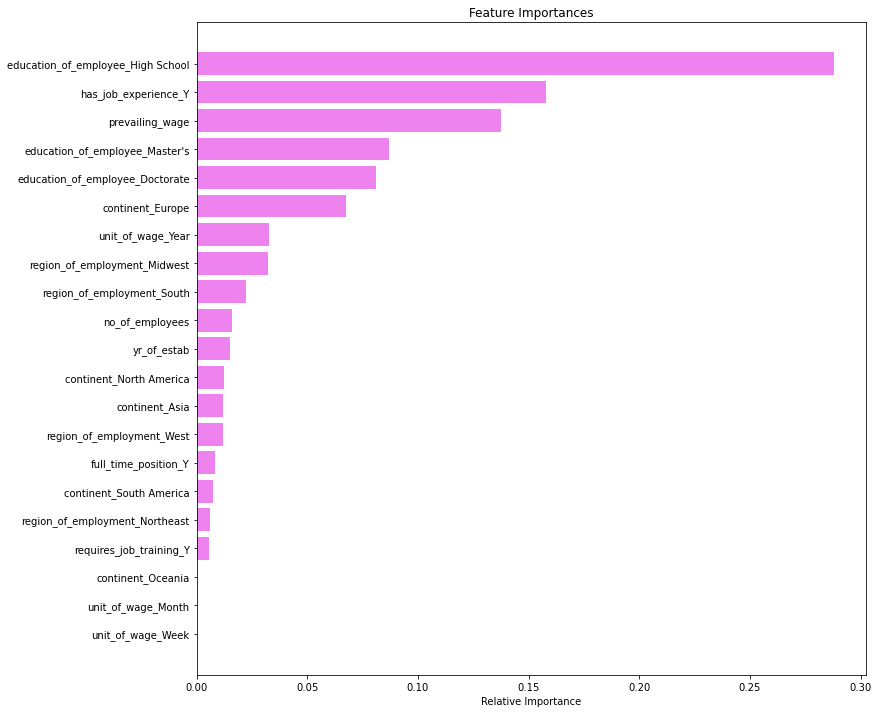

<IPython.core.display.Javascript object>

In [104]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations

* We have been able to build a predictive model that can be used by the Easy Visa to ascertain the case status of an individual with an f1_score of 0.82 on the training set and possibly reduce the time taken to select a suitable candidate.

* All the classification models have given a generalized performance on the training and test set.

* Criteria to accept a visa application according to the feature importances should depend on three main factors - Education of Employee High School, Previou Job Experience and Prevailing Wage.
